## Основные примеры использования Pandas

В этом ноутбуке мы рассмотрим некоторые базовые концепции Pandas. Начнем с импорта стандартных библиотек для работы с данными:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Ряды

Ряд похож на список или одномерный массив, но с индексом. Все операции выполняются с учетом индекса.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Одним из частых применений серии является **временной ряд**. Во временных рядах индекс имеет особую структуру — обычно это диапазон дат или временных меток. Мы можем создать такой индекс с помощью `pd.date_range`.

Предположим, у нас есть серия, показывающая количество товара, покупаемого каждый день, и мы знаем, что каждое воскресенье нам также нужно брать один предмет для себя. Вот как это можно смоделировать с использованием серии:


Length of index is 366


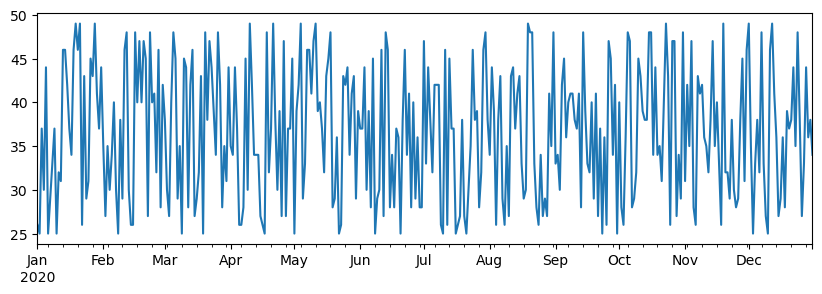

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Как вы видите, у нас здесь возникают проблемы, потому что в еженедельной серии неупомянутые дни считаются отсутствующими (`NaN`), а добавление `NaN` к числу дает `NaN`. Чтобы получить правильный результат, нам нужно указать `fill_value` при сложении серий:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


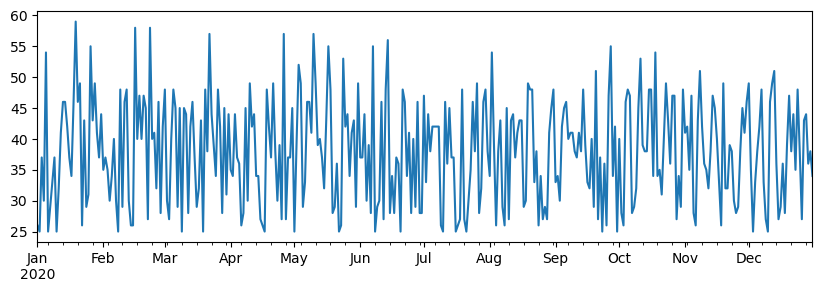

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

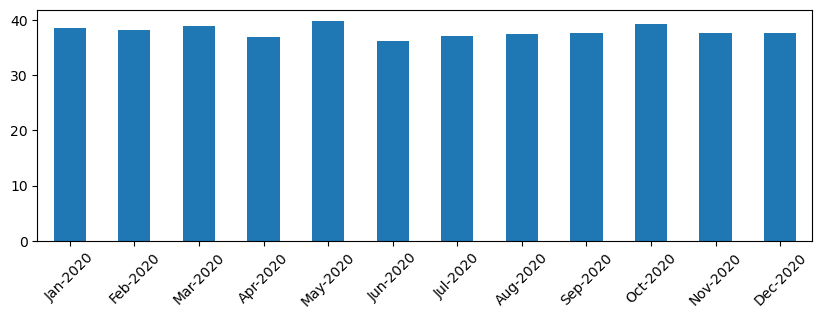

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame — это, по сути, набор серий с одинаковым индексом. Мы можем объединить несколько серий вместе в DataFrame. Учитывая серии `a` и `b`, определенные выше:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Мы также можем использовать Series в качестве столбцов и задавать имена столбцов с помощью словаря:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Тот же результат можно достичь, транспонируя (а затем переименовывая столбцы, чтобы соответствовать предыдущему примеру):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Выбор столбцов** из DataFrame можно выполнить следующим образом:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Выбор строк** на основе выражения фильтра:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Принцип работы заключается в том, что выражение `df['A']<5` возвращает булевый ряд, который указывает, является ли выражение `True` или `False` для каждого элемента ряда. Когда ряд используется в качестве индекса, он возвращает подмножество строк в DataFrame. Таким образом, невозможно использовать произвольное булевое выражение Python, например, запись `df[df['A']>5 and df['A']<7]` будет неправильной. Вместо этого следует использовать специальную операцию `&` для булевых рядов:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Создание новых вычисляемых столбцов**. Мы можем легко создавать новые вычисляемые столбцы для нашего DataFrame, используя интуитивно понятные выражения. Код ниже вычисляет отклонение A от его среднего значения.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Что на самом деле происходит, так это то, что мы вычисляем ряд, а затем присваиваем этот ряд левой части, создавая еще одну колонку.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Выбор строк на основе чисел** можно выполнить с помощью конструкции `iloc`. Например, чтобы выбрать первые 5 строк из DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Группировка** часто используется для получения результата, аналогичного *сводным таблицам* в Excel. Предположим, что мы хотим вычислить среднее значение столбца `A` для каждого заданного значения `LenB`. Тогда мы можем сгруппировать наш DataFrame по `LenB` и вызвать `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Если нам нужно вычислить среднее значение и количество элементов в группе, то мы можем использовать более сложную функцию `aggregate`:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Печать и построение графиков

Датасаентистам часто приходится исследовать данные, поэтому важно уметь их визуализировать. Когда DataFrame большой, зачастую нужно просто убедиться, что всё делается правильно, напечатав первые несколько строк. Это можно сделать, вызвав `df.head()`. Если вы запускаете это из Jupyter Notebook, DataFrame будет выведен в удобной табличной форме.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Мы также рассмотрели использование функции `plot` для визуализации некоторых столбцов. Хотя `plot` очень полезен для многих задач и поддерживает множество различных типов графиков через параметр `kind=`, вы всегда можете использовать библиотеку `matplotlib` напрямую, чтобы построить что-то более сложное. Мы подробно рассмотрим визуализацию данных в отдельных уроках курса.


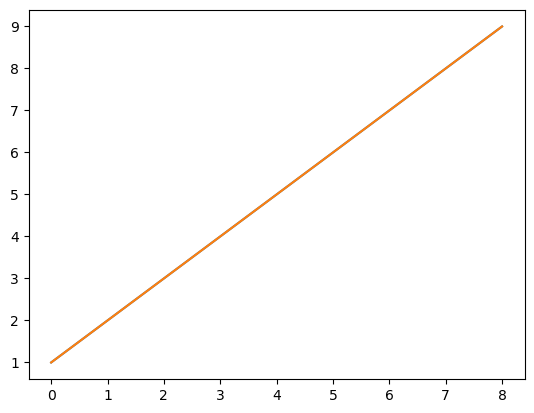

In [61]:
df['A'].plot()
plt.show()

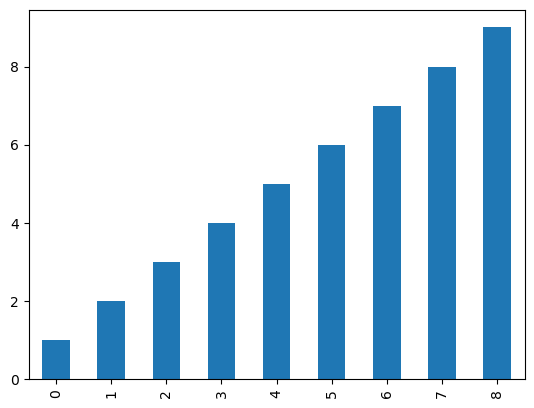

In [63]:
df['A'].plot(kind='bar')
plt.show()

Этот обзор охватывает основные концепции Pandas, однако библиотека очень обширна, и возможности её использования практически безграничны! Давайте теперь применим эти знания для решения конкретной задачи.



---

**Отказ от ответственности**:  
Этот документ был переведен с использованием сервиса автоматического перевода [Co-op Translator](https://github.com/Azure/co-op-translator). Хотя мы стремимся к точности, пожалуйста, имейте в виду, что автоматические переводы могут содержать ошибки или неточности. Оригинальный документ на его исходном языке следует считать авторитетным источником. Для получения критически важной информации рекомендуется профессиональный перевод человеком. Мы не несем ответственности за любые недоразумения или неправильные интерпретации, возникшие в результате использования данного перевода.
